In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


In [53]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True, preprocessing_function = preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [54]:
train = train_datagen.flow_from_directory(directory = "./BangladeshiCrops/Crop___Disease/Rice/", target_size = (256, 256), batch_size = 32)

val = val_datagen.flow_from_directory(directory = "./BangladeshiCrops/Crop___Disease/VAL_Rice/", target_size = (256, 256), batch_size = 32)


Found 2272 images belonging to 4 classes.
Found 1806 images belonging to 1 classes.


In [55]:
t_img, label = train.next()

In [56]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
         plt.figure(figsize=(5,5))
         plt.imshow(im)
         plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


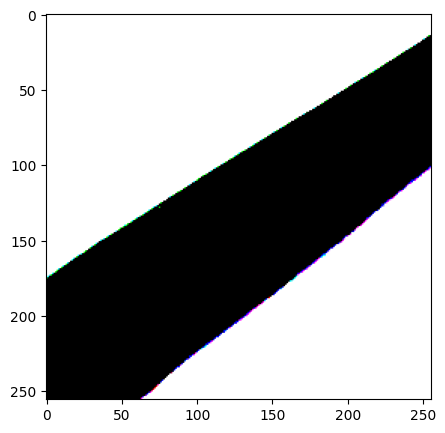

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


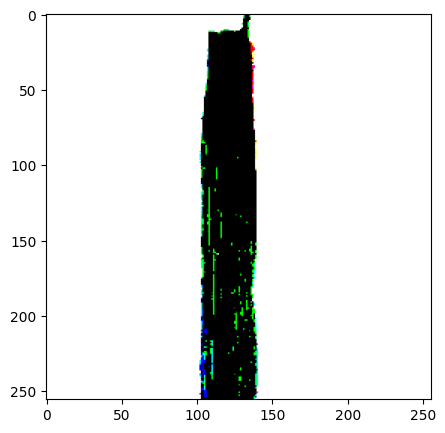

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


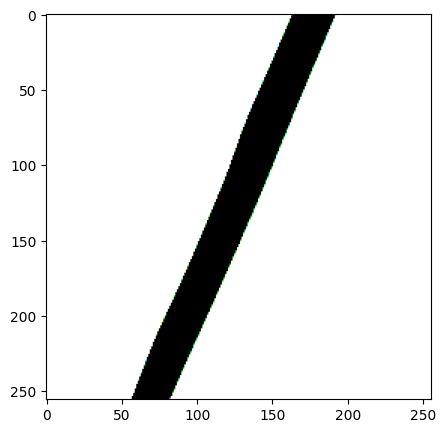

In [57]:
plotImage(t_img[:3], label[:3])

In [58]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [59]:
base_model = VGG19(input_shape = (256, 256, 3), include_top = False)


In [60]:
for layer in base_model.layers:
    layer.trainable = False

In [61]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [62]:
x = Flatten()(base_model.output)

x = Dense(units = 4, activation= 'softmax')(x)

# Creating the model
model = Model(base_model.input, x)

In [63]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [64]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [65]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping
es = EarlyStopping(monitor= 'val_accuraccy', min_delta= 0.01, patience= 3, verbose= 1)

# Model Checkpoint
mc = ModelCheckpoint(filepath= 'best_model.h5', monitor= 'val_accuraccy', min_delta= 0.01, patience= 3, verbose= 1, save_best_only= True)

cb = [es, mc]

In [66]:
his = model.fit(train, steps_per_epoch= 16, epochs= 50, verbose= 1, callbacks= cb, validation_data= val, validation_steps= 16)
#piss = model.fit(train, batch_size= 25, verbose= 1, epochs= 50, validation_data= val, steps_per_epoch= 16, callbacks = cb)

Epoch 1/50
16/16 [==============================] - 129s 8s/step - loss: 5.3930 - accuracy: 0.5781 - val_loss: 104.6263 - val_accuracy: 0.0410
Epoch 2/50
16/16 [==============================] - 130s 8s/step - loss: 3.4950 - accuracy: 0.7441 - val_loss: 126.1629 - val_accuracy: 0.0547
Epoch 3/50
16/16 [==============================] - 130s 8s/step - loss: 3.5328 - accuracy: 0.7676 - val_loss: 145.3437 - val_accuracy: 0.0723
Epoch 4/50
 1/16 [>.............................] - ETA: 1:11 - loss: 2.3097 - accuracy: 0.7812

KeyboardInterrupt: 

In [ ]:
acc = model.evaluate(val)[1]

print(f"The accuracy of your model is = {acc*100} %")

In [ ]:
zip( list(train.class_indices.values(), list(train.class_indices.keys()) ) )

In [87]:
def prediction(path) -> int:
    img = load_img(path, target_size=(256, 256))
    i = img_to_array(img)

    im = preprocess_input(i)

    img = np.expand_dims(im, axis = 0)

    pred = np.argmax(model.predict(img))

    return pred


In [88]:
# Testing to see if the ML is working
path = "/Users/georgeharris/websiteWorkspace/RLLC/BangladeshiCrops/Crop___Disease/VAL_Rice/VAL_Data/IMG20201109185144_00.jpg"
out: int = prediction(path)

if out == 0:
    print("This rice has Brown Spot!")
if out == 1:
    print("This rice is Healthy!")
if out == 2:
    print("This rice has Leaf Blast!")
if out == 3:
    print("This rice has Neck Blast!")


1/1 [==============================] - 0s 166ms/step
This rice has neck blast!
